<h4>OBJECTIVE

To find the following:

1.overall sales trend

2.Top 10 products by sales

3.Most Selling Products

4.Most preferred Shipping Mode

5.Most Profitable Category and Sub-Category

<h4>REQUIRED LIBRARIES

1. Data Manipulation - Pandas


2. Data Visualisation - Matplotlib and Seaborn
  (Seaborn - Python data visualization library based on matplotlib used for making visually attractive graphics)
  

3. %matplotlib inline - magic function to enable the inline plotting, where the plots/graphs will be displayed just below the cell where your plotting commands are written.

<h4> DATASET

Dataset of sales in an US superstore in excel format from GitHub

In [53]:
# importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#creating a pandas dataframe from source excel file

df = pd.read_excel("C:\\Users\\jaysr\\OneDrive\\Desktop\\superstore_sales.xlsx")

<h4>DATA PROCESSING

In [9]:
# head function returns the top five rows of a dataframe

df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [11]:
# shape attribute in Pandas enables us to obtain the shape of a DataFrame (No of rows and columns)

df.shape

(51290, 21)

In [72]:
# summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [16]:
#Checking missing values
#returns the number of missing values in each column.

df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

<h6>DATA ANALYSIS

- <h4> Overall Sales Trend

In [23]:
# When was the first data entered

df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [24]:
# When was the last data entered

df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [40]:
# Getting month year from order_date
# apply function is used to apply function to every row in given dataframe
#strftime function is used to convert date and time objects to their string representation

df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [45]:
df['month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [46]:
# grouping month_year by sales
# groupby function is used to split the data into groups based on some criteria.
#sum function groups data on month_year column and calculates the sum for all numeric columns of DataFrame.
# reset_index function is used to reset index of a Data Frame.

df_trend = df.groupby('month_year').sum(numeric_only=True)['sales'].reset_index()

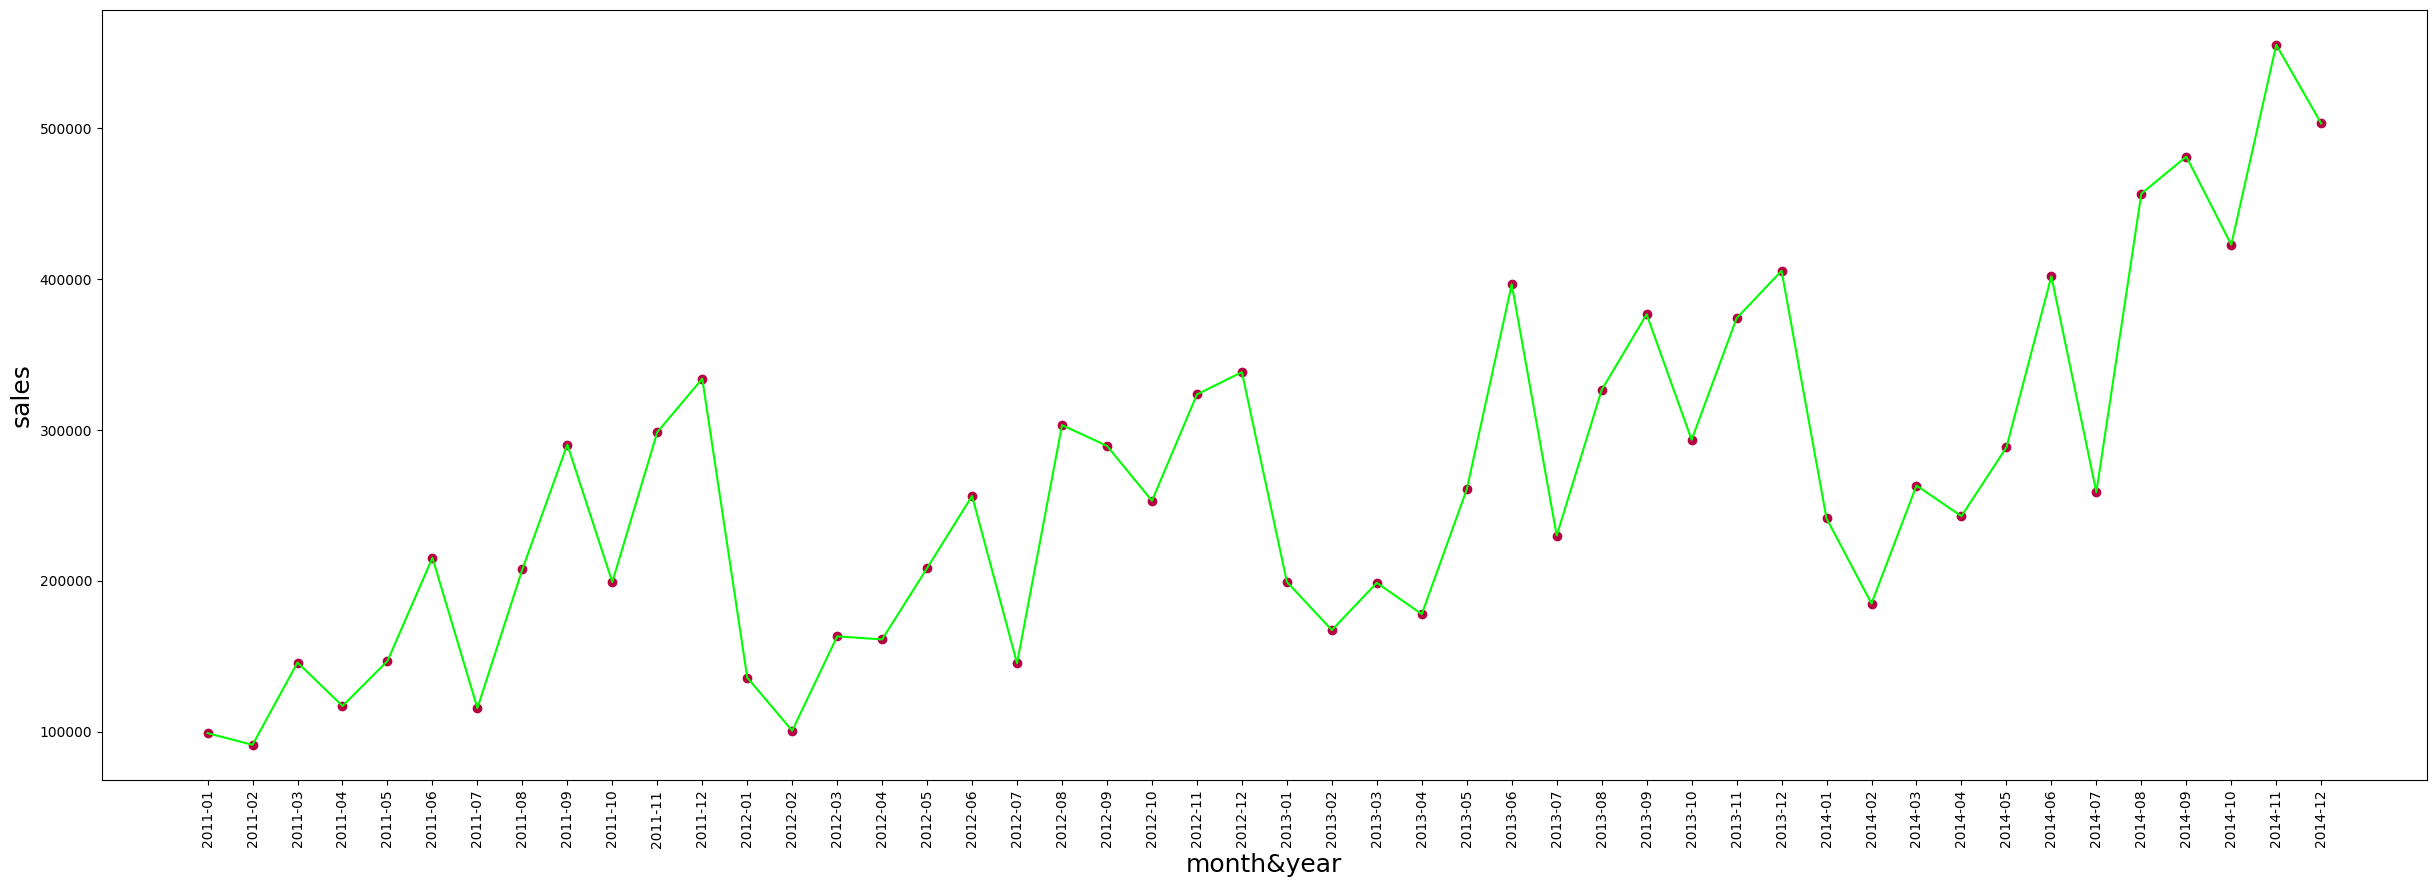

In [70]:
# line graph
plt.figure(figsize=(30, 10))
plt.ylabel('sales', fontsize=18)
plt.xlabel('month&year', fontsize=18)
plt.xticks(rotation='vertical', size=10)
plt.scatter(df_trend['month_year'], df_temp['sales'],  color='#b80045')
plt.plot(df_trend['month_year'], df_temp['sales'], color='#00FF00')
plt.show()

- <h4>Top 10 products by sales

In [50]:
# grouping products by sales

prod_sales = pd.DataFrame(df.groupby('product_name').sum(numeric_only=True)['sales'])

In [51]:
# Sorting the dataframe in descending order
#sort_values function sorts a data frame in Ascending or Descending order of passed Column

prod_sales.sort_values(by=['sales'],ascending=False)

# top 10 products by sales

prod_sales[:10]

,sales
product_name,
"""While you Were Out"" Message Book, One Form per Page",25.228
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",146.688
"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",176.288
#6 3/4 Gummed Flap White Envelopes,71.280
"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",2706.080


- <h4>Most Selling Products

In [56]:
# grouping products by quantity

best_selling_prods = pd.DataFrame(df.groupby('product_name').sum(numeric_only=True)['quantity'])

In [57]:
# sorting the dataframe in descending order

best_selling_prods.sort_values(by=['quantity'], ascending=False)

# most selling products

best_selling_prods[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


-<h4>Most preferred Shipping Mode

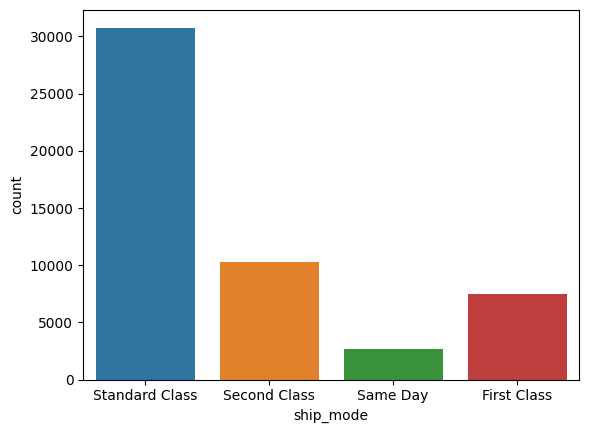

<Figure size 1000x800 with 0 Axes>

In [59]:
# countplot: Show the counts of observations in each categorical bin using bars

sns.countplot(x='ship_mode', data=df)
plt.figure(figsize=(10, 8))
plt.show()

- <h4> Most Profitable Category and Sub-Category

In [61]:
# Grouping products by Category and Sub-Category

cat_subcat = pd.DataFrame(df.groupby(['category', 'sub_category']).sum(numeric_only=True)['profit'])

# Sorting the values

cat_subcat.sort_values(['category','profit'], ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

<H4> STATISCIAL SUMMARY OF THE DATASET

In [75]:
# describe method gives descriptive statistics of the data frame.Tt only shows the statistics on the numerical columns.

df.describe().round()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,246.0,3.0,0.0,29.0,26.0,2013.0
std,488.0,2.0,0.0,174.0,57.0,1.0
min,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,31.0,2.0,0.0,0.0,3.0,2012.0
50%,85.0,3.0,0.0,9.0,8.0,2013.0
75%,251.0,5.0,0.0,37.0,24.0,2014.0
max,22638.0,14.0,1.0,8400.0,934.0,2014.0


<h4>END